# Independent investigation of TMDB dataset that will knock your socks off:
### Just take them off now ok?
First let's read/convert our CSV to a Pandas dataframe:

In [221]:
## I prefer to import each library at the beginning of the Notebook
## It is important to note that this investigation was built using the Python 2 kernel, 
## so there will be errors in the print statements if you are using Python 3.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Let's start by creating our PandaS DataFrame from the provided CSV:

In [260]:
movie_data = pd.read_csv('tmdb-movies.csv')

movie_data.head(5)
#printing only the first 5 rows will allow me to see what data is contained in my DataFrame:

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## In this investigation I would like to know how budget and revenue relate to the popularity rating.

- I postulate there is a positive correlation between popularity vs budget, as well as revenue vs popularity.
    - My hypothesis is that the more money spent, the more exposure a film gets, and therefore the more revenue and higher popularity rating.

### Here are some ways I plan to do this:
1.) Group the data by year, and analyze at least three data sets from years at least 10 years apart

2.) Plot popularity vs revenue and popularity vs budget

    a.) Create a scatter plot and a line graph
    
    b.) Calculate Pearson's R Value for each correlation
    
*BONUS*

3.) Create a scatter plot of revenue vs budget, and the size of each dot will be popularity


### Important Note(s):

- In actuality many variables contribute to a films popularity, however, we cannot investigate them all for brevity's sake. Most big data companies can do this using machine learning algorithms.
- I do not know the exact calculation used to acquire the popularity rating. This may affect our conclusions since we can only assume that the higher the number, the more popular the film.
- I am not using the budget/revenue adjusted for inflation figures. This is because when these data are compared to popularity, inflation should not factor in.


### We should build functions to standardize our data, and calculate Pearson's R:

In [262]:
# Let's start by defining functions to standardize our data:

def standardize_column(column):
    return (column-column.mean()) / column.std(ddof=0)

def standardize_rows(df):
    mean_diffs = df.sub(df.mean(axis='columns'), axis='index')
    return mean_diffs.div(df.std(axis='columns',ddof=0), axis='index')

def standardize(df):
    return df.apply(standardize_column)

# And this function will help us see a correlation between two sets of variables (Pearson's R):

def correlation(x,y):
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

## For starters, I would like to slice the data to create three data sets, the most current year 2015 (our primary investigation set) and  for comparison: 2000 and 1985.

We can use PandaS `set_index()` function to set the index to the movie title to make our data more understandable:

In [275]:
#I noticed that PandaS used Float values for adjusted revenue and budget, we need those to be integers to work with them.
#First thing to do will be to convert them to integers:

movie_data['budget_adj'] = movie_data['budget_adj'].apply(np.int64)
movie_data['revenue_adj'] = movie_data['revenue_adj'].apply(np.int64)

In [276]:
movies_in_2015 = movie_data[movie_data['release_year']==2015].set_index('original_title')
movies_in_2000 = movie_data[movie_data['release_year']==2000].set_index('original_title')
movies_in_1985 = movie_data[movie_data['release_year']==1985].set_index('original_title')

## Next, let's trim down our dataframe to only include the factors budget, revenue, and popularity

In [277]:
pop_bdgt_rev_2015 = movies_in_2015[['budget_adj','popularity', 'revenue_adj']]
pop_bdgt_rev_2000 = movies_in_2000[['budget_adj','popularity', 'revenue_adj']]
pop_bdgt_rev_1985 = movies_in_1985[['budget_adj','popularity', 'revenue_adj']]

pop_bdgt_1985.head(20)

,budget,popularity
original_title,,
Back to the Future,19000000,6.095293
The Breakfast Club,1000000,2.834739
Ladyhawke,20000000,1.753688
Mad Max Beyond Thunderdome,12305523,1.746063
A View to a Kill,30000000,1.623978
Legend,25000000,1.613752
The Goonies,19000000,1.596994
A Nightmare on Elm Street Part 2: Freddy's Revenge,3000000,1.299275
Rambo: First Blood Part II,44000000,1.177428


## Back to the future AND Rocky IV?? '85 was a good year :-)
### But ... I noticed after printing this dataset, that there were lot's of movies with "0" for the budget.
That doesn't seem right, because it's impossible for a movie not to have a budget. Perhaps for some movies, this data was simply not made available and auto-filled as '0'? So let's clean up the data and remove those entries, simply because we cannot use or trust them:

In [278]:
pop_bdgt_rev_2015 = pop_bdgt_rev_2015[pop_bdgt_rev_2015['budget_adj']>0]
# and for our comparison years:
pop_bdgt_rev_2000 = pop_bdgt_rev_2000[pop_bdgt_rev_2000['budget_adj']>0]
pop_bdgt_rev_1985 = pop_bdgt_rev_1985[pop_bdgt_rev_1985['budget_adj']>0]

# Now we see only the movies with data for budget:
pop_bdgt_rev_2015.head()

,budget_adj,popularity,revenue_adj
original_title,,,
Jurassic World,137999939,32.985763,1392445892
Mad Max: Fury Road,137999939,28.419936,348161292
Insurgent,101199955,13.112507,271619025
Star Wars: The Force Awakens,183999919,11.173104,1902723129
Furious 7,174799923,9.335014,1385748801


In [279]:
# now let's standardize our columns:
standardized_data_2015 = standardize(pop_bdgt_rev_2015)
standardized_data_2000 = standardize(pop_bdgt_rev_2000)
standardized_data_1985 = standardize(pop_bdgt_rev_1985)

# here is a sample:
standardized_data_2015.head()

,budget_adj,popularity,revenue_adj
original_title,,,
Jurassic World,2.313175,8.814597,5.113760
Mad Max: Fury Road,2.313175,7.502616,0.934046
Insurgent,1.500294,3.104059,0.627688
Star Wars: The Force Awakens,3.329277,2.546776,7.156127
Furious 7,3.126057,2.018605,5.086955


# Let's investigate Budget vs Popularity:

**We can start by calculating Pearson's R to see if there is a positive correlation:**

**2015**

In [295]:
correlation(pop_bdgt_rev_2015['budget_adj'], pop_bdgt_rev_2015['popularity'])

0.60559235803122269

**2000**

In [296]:
correlation(pop_bdgt_rev_2000['budget_adj'], pop_bdgt_rev_2000['popularity'])

0.41627482678603367

**1985**

In [297]:
correlation(pop_bdgt_rev_1985['budget_adj'], pop_bdgt_rev_1985['popularity'])

0.17416336790445094

# Now let's investigate Revenue vs Popularity:


**2015**

In [298]:
correlation(pop_bdgt_rev_2015['revenue_adj'], pop_bdgt_rev_2015['popularity'])

0.66266798299720631

**2000**

In [299]:
correlation(pop_bdgt_rev_2000['revenue_adj'], pop_bdgt_rev_2000['popularity'])

0.69767842785117118

**1985**

In [300]:
correlation(pop_bdgt_rev_1985['revenue_adj'], pop_bdgt_rev_1985['popularity'])

0.67018810052408861

# ScatterPlot of Standardized data:

budget vs revenue, with dot size as popularity rating:

## 2015

Populating the interactive namespace from numpy and matplotlib


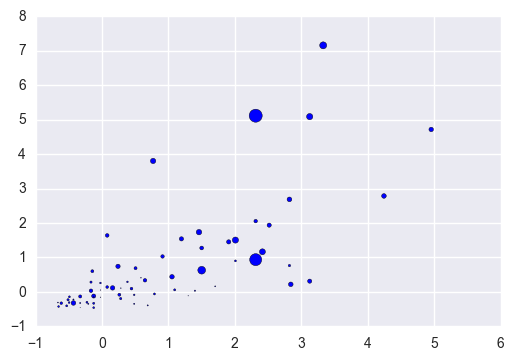

In [283]:
%pylab inline

plt.scatter(standardized_data_2015['budget_adj'], standardized_data_2015['revenue_adj'], \
            s= (standardized_data_2015['popularity']*10))

## 2000

Populating the interactive namespace from numpy and matplotlib


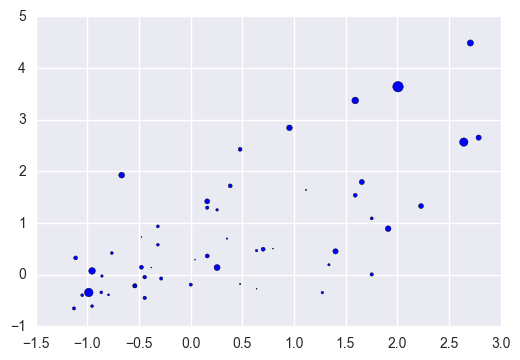

In [284]:
%pylab inline

plt.scatter(standardized_data_2000['budget_adj'], standardized_data_2000['revenue_adj'], \
            s= (standardized_data_2000['popularity']*10))

## 1985

Populating the interactive namespace from numpy and matplotlib


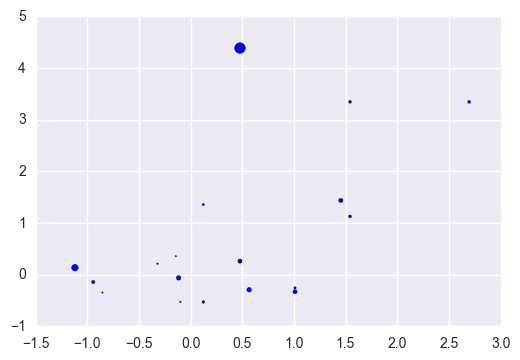

In [290]:
%pylab inline

plt.scatter(standardized_data_1985['budget_adj'], standardized_data_1985['revenue_adj'], \
            s= (standardized_data_1985['popularity']*10))

# Initial Obersvations:
- There is a positive correlation between revenue and popularity
    - This correlation stays the same over time
- There is a positive correlation between budget and popularity
    - This correlation increases over time

## Let's plot each variable over time to confirm this:
We will need to use the full data set

### Show me the money!
Budget will be green, revenue will be blue

Populating the interactive namespace from numpy and matplotlib


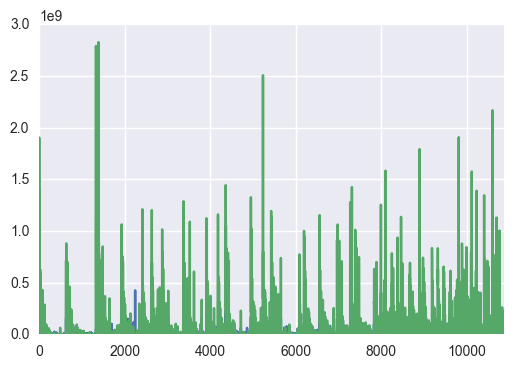

In [235]:
%pylab inline 

budgt_by_year.plot()
rev_by_year.plot()

### Show me the popularity: